# Tobig's 15기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [15]:
import pandas as pd
import numpy as np
import random

In [16]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [21]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [22]:
# parameter 개수
N = len(X_train.loc[0])

In [23]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.16168248, 0.06287374, 0.0368519 ])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [24]:
def dot_product(X, parameters):
# (n, 1) 사이즈의 벡터 X와 (n, 1) 사이즈의 벡터 parameters의 내적을 구한다.
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = {1 \over1+e^{-X_i\theta}}$

In [25]:
def logistic(X, parameters):
    # logistic 함수를 계산한다.
    z = np.exp(-dot_product(X, parameters))
#     z = np.exp(-np.dot(X, parameters))
    p = 1/(1+z)
    return p

In [26]:
logistic(X_train.iloc[1], parameters)

0.5591820988778776

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) =-\Sigma \begin{bmatrix}y_i \log p+(1-y_i)\log(1-p)\end{bmatrix}$ 

In [27]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -y*np.log(p)+(1-y)*np.log(1-p)
    return loss

In [28]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = 0.5*np.sum((y-parameters)**2)
    return loss

In [29]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [30]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

-0.5166539183871012

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\Sigma (y_i-\theta^TX_i)X_{j}$
## ${\partial\over{\partial \theta_j}}l(p)=-\Sigma (y_i-p_i)x_{ij}$ 

In [31]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = -(y-y_hat)*X[j]
    else:
        p = logistic(X, parameters)
        gradient = -(y-p)*X[j]
    return gradient

In [32]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.0877848787524356

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [33]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]

    for i in range(len(y_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
            # 데이터별로 j번째 factor의 gradinet를 계산하여 합산한다.
    
    return gradients

In [34]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[39.036287208801525, -14.727469071108398, 17.15363728890775]

## mini-batch
인덱스로 미니 배치 나누기

In [35]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 주어진 배치사이즈대로 전체 데이터를 나눈다. 이 때, output은 각 배치에 들어가는 원 데이터의 인덱스를 가지고 있다. 

### 예를 들어, idx_list가 [ [1,2,3],[4,5,6]]와 같이 이뤄졌다면 첫번째 미니배치에는 1번, 2번, 3번 데이터가 들어가고, 두번째 미니배치에는 4,5,6번 데이터가 들어간다는 뜻이다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [36]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        # 각 데이터별 gradient의 평균에다가 learning rate를 곱해준다.
        gradients[i] *= learning_rate/n
    
    parameters -= gradients # loss가 작아지는 방향으로 파라미터를 업데이트한다.
    return parameters

In [37]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.15908006, 0.06385557, 0.03570832])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 
- num_epoch:
<br>

BGD: 전체 데이터를 모두 검토하여 기울기를 계산한 후 갱신한다.
SGD: 랜덤하게 데이터를 하나 선정하여 기울기를 계산한 후 갱신한다.
MGD: 데이터를 미니배치로 쪼개서 미니배치를 랜덤으로 선택하여 기울기를 계산한 후 갱신한다.
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD  
batch_size=k -> MGD
batch_size=whole -> BGD

In [102]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)  # 미니배치 그래디언트를 구한다.
            parameters = step(parameters, gradients, learning_rate, batch_size) # 앞에서 구한 그래디언트를 토대로 업데이트한다.
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, batch_size) # 새로운 loss를 계산한다.
#             print(new_loss)
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [141]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = len(y_train), learning_rate = 0.05)
new_param_bgd
# accuracy: 0.84

epoch: 0  loss: -0.3515238057397422  params: [0.00275966 0.07038807 0.87735573]  gradients: [0.01099535597968274, 0.001857564518555483, 0.014712470065032155]
epoch: 100  loss: -0.01887809423958329  params: [-0.64202969  0.2544271  -0.07192085]  gradients: [0.003349930042397789, -0.003746848994735771, 0.006041960154047421]
epoch: 200  loss: 0.0326817130667394  params: [-0.85169862  0.63660301 -0.54750401]  gradients: [0.0013141777636514853, -0.0036409361511229492, 0.003908456665180843]
epoch: 300  loss: 0.04010501500760282  params: [-0.94960912  0.96898651 -0.88950928]  gradients: [0.0007586874603854417, -0.0030199151053817356, 0.0030259559883126313]


array([-0.95557674,  0.99293887, -0.9134793 ])

In [126]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 1, learning_rate = 0.01)
new_param_sgd
# accuracy: 0.94

epoch: 0  loss: -0.8089059538530856  params: [-0.15386163  0.15605919  0.40994142]  gradients: [0.005571185683727282, 0.0030318445777457043, 0.003919834667861157]
epoch: 100  loss: -0.1195497709432269  params: [-1.6259318   3.45731321 -3.2962252 ]  gradients: [0.0011288247519348718, 0.0006143075096878092, 0.0007942306445642932]
epoch: 200  loss: -0.09721083123547691  params: [-1.78695827  3.97821394 -3.78041297]  gradients: [0.000927750889194419, 0.0005048829212637218, 0.0006527569363242421]
epoch: 300  loss: -0.09082210393119745  params: [-1.84018221  4.14923843 -3.93827692]  gradients: [0.0008694340000169169, 0.0004731468143950817, 0.0006117257130089828]
epoch: 400  loss: -0.08856555019786773  params: [-1.85991801  4.21254096 -3.99657553]  gradients: [0.0008487489256185563, 0.0004618899771228803, 0.0005971718861690676]
epoch: 500  loss: -0.08771282053262588  params: [-1.86751251  4.2368848  -4.01897628]  gradients: [0.0008409203752237013, 0.00045762967251024154, 0.0005916637905896145

array([-1.87234254,  4.25236291, -4.03321356])

In [142]:
new_param_mgd = gradient_descent(X_train, y_train, learning_rate= 0.25, batch_size = 32)
new_param_mgd
# accuracy: 0.94

epoch: 0  loss: -0.38020287753886517  params: [ 0.35865811  0.88664486 -0.13965177]  gradients: [0.05628692408949877, 0.036124843602544476, 0.07052986952877698]
epoch: 100  loss: -0.06041446497401403  params: [-1.56782422  3.2711391  -3.12039997]  gradients: [0.007849240263259833, 0.0018515417793601116, 0.0033409808707917763]
epoch: 200  loss: -0.08078658199679613  params: [-1.74313054  3.84355375 -3.65378376]  gradients: [0.009975660060160084, 0.0024741457464060278, 0.0010014106656712277]
epoch: 300  loss: -0.08848981026808492  params: [-1.81226775  4.0671741  -3.86048294]  gradients: [0.01075759169723184, 0.002696465595769065, 0.0002284689604287668]
epoch: 400  loss: -0.0918572547037736  params: [-1.84297959  4.16622347 -3.95175129]  gradients: [0.011094145139669484, 0.0027905937675799237, -9.265110683896147e-05]
epoch: 500  loss: -0.0934108868638003  params: [-1.85724994  4.21219268 -3.99405099]  gradients: [0.011248237015560191, 0.0028333355853228694, -0.00023755187428318726]
epoch

array([-1.86990023,  4.25291552, -4.03149259])

### Predict Label

In [157]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [158]:
from sklearn.metrics import *

In [159]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 1,  9]])

In [160]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [103]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [104]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [105]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.7157328 , 1.99193104])

In [106]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.43294489022893523  params: [1.13149351 0.63107226]  gradients: [-0.011661887718443573, -0.008784698887387836]
epoch: 100  loss: 0.33018520310286237  params: [0.72454951 1.98278142]  gradients: [0.000549052826907534, 0.0005143080998801324]
epoch: 200  loss: 0.3312368589408224  params: [0.72262628 1.98639456]  gradients: [0.0005487825432432709, 0.0005217092509951313]
epoch: 300  loss: 0.3312399796976779  params: [0.72262059 1.98640524]  gradients: [0.0005487817435803407, 0.0005217311480869029]
epoch: 400  loss: 0.33123998893084977  params: [0.72262058 1.98640528]  gradients: [0.0005487817412144568, 0.0005217312128717752]
epoch: 500  loss: 0.33123998895816686  params: [0.72262057 1.98640528]  gradients: [0.0005487817412074506, 0.0005217312130634425]
epoch: 600  loss: 0.3312399889582463  params: [0.72262057 1.98640528]  gradients: [0.000548781741207427, 0.0005217312130639979]
epoch: 700  loss: 0.3312399889582463  params: [0.72262057 1.98640528]  gradients: [0.000548781741

array([0.72262057, 1.98640528])

In [110]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

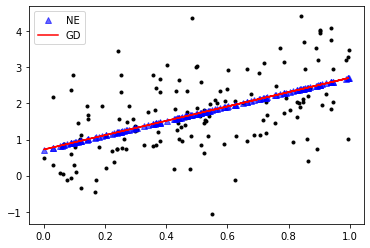

In [119]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '^b', label = 'NE', alpha = 0.6) #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()